# White Wine Quality Regression - Local Train
- Developed by Marcelo Rovai @ 13 february 2022

In [114]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
random.seed(42)

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (10, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

## Dataset
- https://archive.ics.uci.edu/ml/datasets/wine+quality

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
- Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems,
- Elsevier, 47(4):547-553, 2009.

In [4]:
!ls ./data

winequality-red.csv            winequality-white.csv
winequality-red_regression.csv


In [8]:
df = pd.read_csv('./data/winequality-white.csv', delimiter=';')
df.shape

(4898, 12)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [11]:
# Verify if values are all non 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

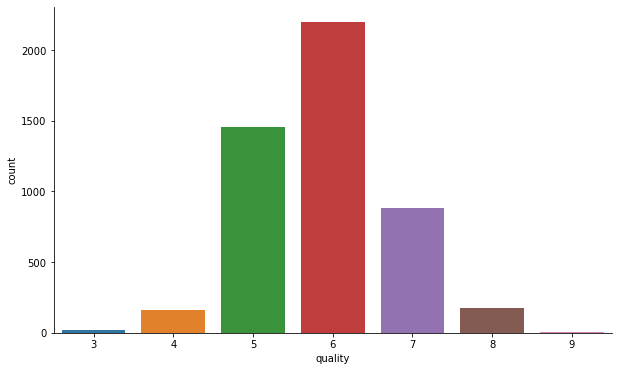

In [120]:
sns.countplot(x=df['quality']);

In [13]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


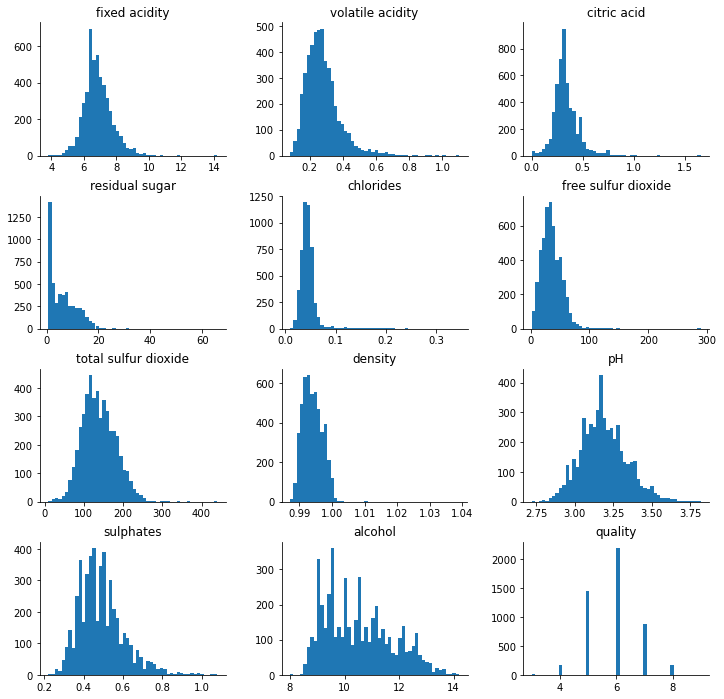

In [122]:
df.hist(bins=50, figsize=(12,12), grid=False);

In [123]:
features_list = list(df.columns[:-1])
features_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

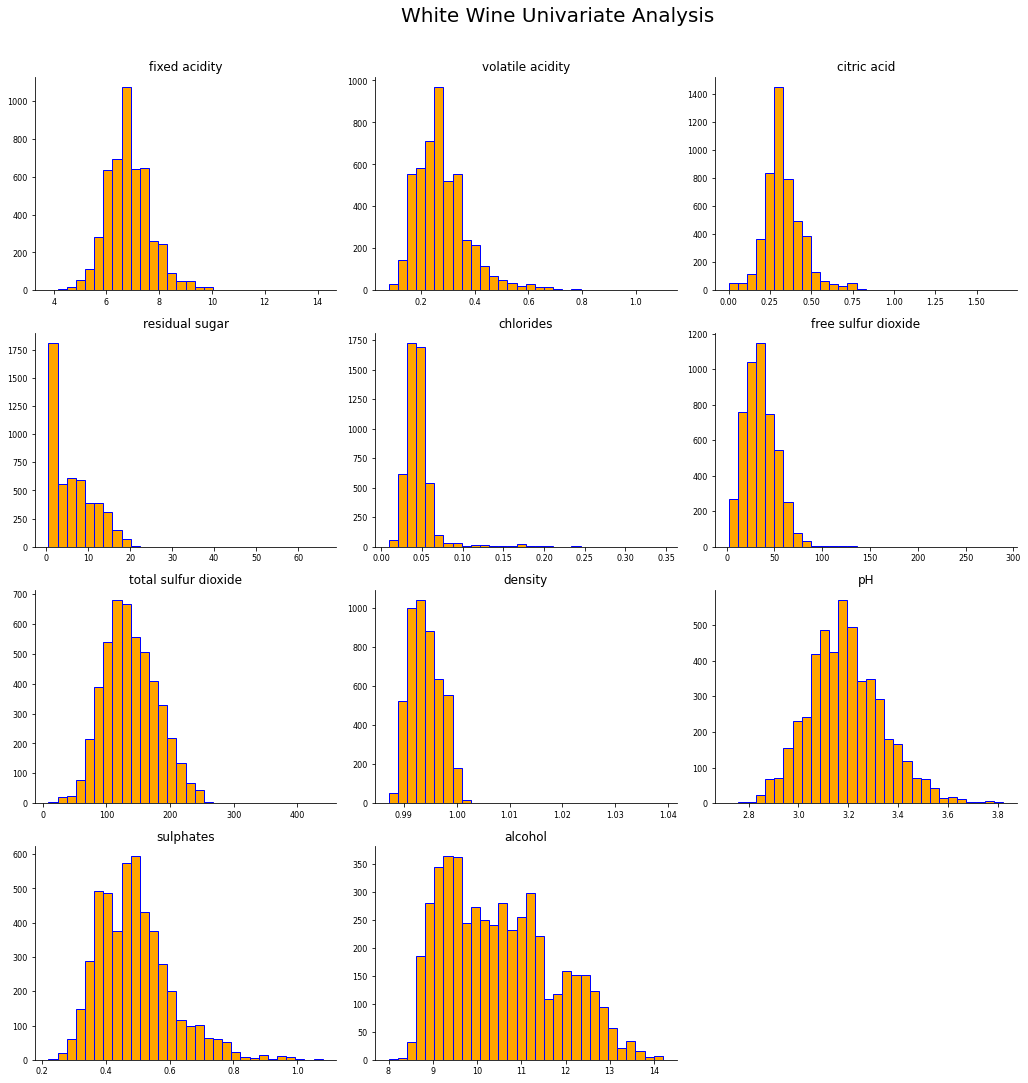

In [130]:
df[features_list].hist(bins=30, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(12,12), color='orange')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('White Wine Univariate Analysis', x=0.65, y=1.25, fontsize=20); 

## Pre-Process data

**Prepare transformer**

In [132]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

transformer = make_column_transformer(
    (MinMaxScaler(), features_list)
)

In [18]:
X = df.drop('quality', axis=1)
y = df['quality']
X.shape, y.shape

((4898, 11), (4898,))

## Training

In [19]:
import sys, os
import tensorflow as tf

import logging
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Init Plugin
Init Graph Optimizer
Init Kernel


In [20]:
# Set random seeds for repeatable results
RANDOM_SEED = 3
tf.random.set_seed(RANDOM_SEED)

### Working with Single-Output Regression

**Split data**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3918, 11), (980, 11))

**Scale values**

In [22]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [23]:
X_train.shape, X_test.shape

((3918, 11), (980, 11))

In [24]:
X_train[0]

array([0.4375    , 0.08823529, 0.21686747, 0.11656442, 0.05637982,
       0.28571429, 0.33333333, 0.108155  , 0.38181818, 0.22093023,
       0.70967742])

In [25]:
X_train

array([[0.4375    , 0.08823529, 0.21686747, ..., 0.38181818, 0.22093023,
        0.70967742],
       [0.3125    , 0.16666667, 0.26506024, ..., 0.41818182, 0.34883721,
        0.24193548],
       [0.225     , 0.23529412, 0.19879518, ..., 0.48181818, 0.31395349,
        0.5       ],
       ...,
       [0.475     , 0.18627451, 0.31325301, ..., 0.27272727, 0.36046512,
        0.5483871 ],
       [0.3125    , 0.15686275, 0.1746988 , ..., 0.40909091, 0.18604651,
        0.41935484],
       [0.5375    , 0.18627451, 0.21084337, ..., 0.45454545, 0.47674419,
        0.38709677]])

In [26]:
y_train

4665    6
1943    5
3399    6
843     7
2580    5
       ..
4426    6
466     6
3092    6
3772    6
860     8
Name: quality, Length: 3918, dtype: int64

In [27]:
# The output should be continuous 
y_train = y_train.astype('float32')

In [28]:
y_train

4665    6.0
1943    5.0
3399    6.0
843     7.0
2580    5.0
       ... 
4426    6.0
466     6.0
3092    6.0
3772    6.0
860     8.0
Name: quality, Length: 3918, dtype: float32

In [29]:
# Remember the number of samples in the test set
num_samples_train = len(X_train)
num_samples_train

3918

In [30]:
num_samples_test = len(X_test)
num_samples_test

980

In [31]:
X_train.shape[1]

11

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3134, 11) (3134,)
(784, 11) (784,)


In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [34]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [35]:
X.shape

(4898, 11)

In [36]:
tf.random.set_seed(42)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_val, y_val), 
                    verbose=2,
                   )

Epoch 1/100
98/98 - 2s - loss: 4.4468 - rmse: 4.4456 - val_loss: 2.3900 - val_rmse: 2.3830
Epoch 2/100
98/98 - 0s - loss: 1.1723 - rmse: 1.1724 - val_loss: 0.9070 - val_rmse: 0.9092
Epoch 3/100
98/98 - 0s - loss: 0.9220 - rmse: 0.9219 - val_loss: 0.8585 - val_rmse: 0.8607
Epoch 4/100
98/98 - 0s - loss: 0.8847 - rmse: 0.8847 - val_loss: 0.8327 - val_rmse: 0.8352
Epoch 5/100
98/98 - 0s - loss: 0.8618 - rmse: 0.8619 - val_loss: 0.8078 - val_rmse: 0.8100
Epoch 6/100
98/98 - 0s - loss: 0.8489 - rmse: 0.8488 - val_loss: 0.7919 - val_rmse: 0.7942
Epoch 7/100
98/98 - 0s - loss: 0.8331 - rmse: 0.8330 - val_loss: 0.7735 - val_rmse: 0.7754
Epoch 8/100
98/98 - 0s - loss: 0.8217 - rmse: 0.8218 - val_loss: 0.7622 - val_rmse: 0.7645
Epoch 9/100
98/98 - 0s - loss: 0.8140 - rmse: 0.8140 - val_loss: 0.7486 - val_rmse: 0.7506
Epoch 10/100
98/98 - 0s - loss: 0.8009 - rmse: 0.8008 - val_loss: 0.7408 - val_rmse: 0.7432
Epoch 11/100
98/98 - 0s - loss: 0.7908 - rmse: 0.7908 - val_loss: 0.7288 - val_rmse: 0.73

Epoch 91/100
98/98 - 0s - loss: 0.7126 - rmse: 0.7125 - val_loss: 0.6658 - val_rmse: 0.6671
Epoch 92/100
98/98 - 0s - loss: 0.7146 - rmse: 0.7146 - val_loss: 0.6662 - val_rmse: 0.6668
Epoch 93/100
98/98 - 0s - loss: 0.7139 - rmse: 0.7140 - val_loss: 0.6655 - val_rmse: 0.6665
Epoch 94/100
98/98 - 0s - loss: 0.7152 - rmse: 0.7152 - val_loss: 0.6677 - val_rmse: 0.6696
Epoch 95/100
98/98 - 0s - loss: 0.7095 - rmse: 0.7096 - val_loss: 0.6638 - val_rmse: 0.6649
Epoch 96/100
98/98 - 0s - loss: 0.7105 - rmse: 0.7105 - val_loss: 0.6777 - val_rmse: 0.6803
Epoch 97/100
98/98 - 0s - loss: 0.7115 - rmse: 0.7114 - val_loss: 0.6762 - val_rmse: 0.6786
Epoch 98/100
98/98 - 0s - loss: 0.7110 - rmse: 0.7109 - val_loss: 0.6711 - val_rmse: 0.6714
Epoch 99/100
98/98 - 0s - loss: 0.7094 - rmse: 0.7093 - val_loss: 0.6756 - val_rmse: 0.6752
Epoch 100/100
98/98 - 0s - loss: 0.7098 - rmse: 0.7097 - val_loss: 0.6641 - val_rmse: 0.6650


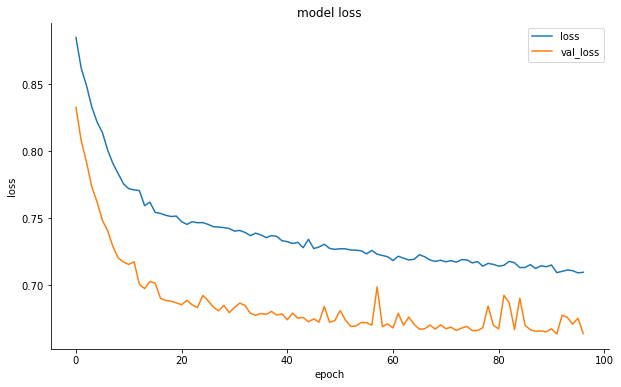

In [38]:
plt.plot(history.history['loss'][3:], label='loss')
plt.plot(history.history['val_loss'][3:], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [39]:
predictions = model.predict(X_test)

In [40]:
predictions[:10]

array([[6.2280726],
       [6.7148924],
       [6.442797 ],
       [5.8334737],
       [6.550875 ],
       [6.35882  ],
       [5.212071 ],
       [5.0402894],
       [5.667191 ],
       [5.3787336]], dtype=float32)

In [41]:
predictions.min()

4.0095167

In [42]:
predictions.max()

7.464927

In [43]:
y_real = y_test.to_numpy()
y_real[:10]

array([7, 8, 8, 5, 7, 6, 5, 4, 6, 5])

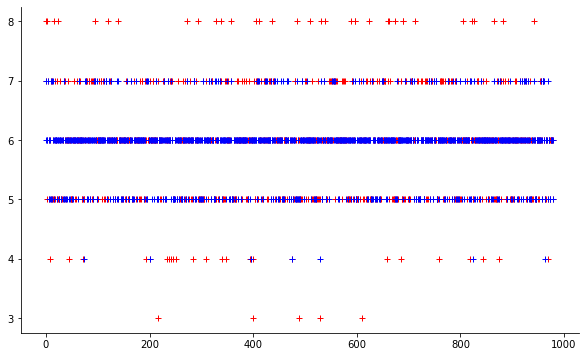

In [44]:
plt.plot(y_real, 'r+')
plt.plot(np.round(predictions).astype('int64'), 'b+')

In [55]:
y_real = y_test.to_numpy()
for n in range(10):
    pred = np.round(predictions[n]).astype('int64')
    print(f"Real value {y_real[n]} ==> Prediction {pred[0]} .... {predictions[n][0]}")

Real value 7 ==> Prediction 6 .... 6.228072643280029
Real value 8 ==> Prediction 7 .... 6.714892387390137
Real value 8 ==> Prediction 6 .... 6.4427971839904785
Real value 5 ==> Prediction 6 .... 5.8334736824035645
Real value 7 ==> Prediction 7 .... 6.550875186920166
Real value 6 ==> Prediction 6 .... 6.358819961547852
Real value 5 ==> Prediction 5 .... 5.212070941925049
Real value 4 ==> Prediction 5 .... 5.040289402008057
Real value 6 ==> Prediction 6 .... 5.667191028594971
Real value 5 ==> Prediction 5 .... 5.3787336349487305


In [47]:
predictions[0][0]

6.2280726

In [338]:
len(predictions)

320

Calculation of "Accuraccy" taking only discrete output values 

In [56]:
num_errors = 0
for n in range(len(predictions)):
    pred = np.round(predictions[n]).astype('int64')
    if (pred[0] - y_real[n]) !=0: 
        num_errors +=1
num_errors

463

In [57]:
print(f"Accuraccy: {round(1-(num_errors/len(predictions)),2)}")

Accuraccy: 0.53


Calculation of "Accuraccy" considering values under and above output values 

In [58]:
num_errors = 0
for n in range(len(predictions)):
    pred = np.round(predictions[n]).astype('int64')
    if (abs(pred[0] - y_real[n])) > 1: 
        num_errors +=1
num_errors

42

In [59]:
print(f"Accuraccy: {round(1-(num_errors/len(predictions)),2)}")

Accuraccy: 0.96


Prediction single values

In [343]:
tst = np.array([0.3274, 0.3288, 0.2500, 0.0890, 0.1770, 0.1194, 0.1131, 0.4471, 0.3228, 0.0982, 0.2154])
tst

array([0.3274, 0.3288, 0.25  , 0.089 , 0.177 , 0.1194, 0.1131, 0.4471,
       0.3228, 0.0982, 0.2154])

In [344]:
tst = np.reshape(tst, (1, X_train.shape[1]))
tst.shape

(1, 11)

In [347]:
model.predict(tst)[0][0]

5.305558

In [348]:
tst = np.array([0.1239, 0.3562, 0.0500, 0.0685, 0.0902, 0.1194, 0.0389, 0.3590, 0.6142, 0.2515, 0.3385])
tst = np.reshape(tst, (1, X_train.shape[1]))
model.predict(tst)[0][0]

5.82767

### Working with Multi-Output Regression

**Split data**

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3918, 11), (980, 11))

**Scale values**

In [83]:
# Fit on the train set
transformer.fit(X_train)

# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [84]:
X_train.shape, X_test.shape

((3918, 11), (980, 11))

In [85]:
X_train[0]

array([0.4375    , 0.08823529, 0.21686747, 0.11656442, 0.05637982,
       0.28571429, 0.33333333, 0.108155  , 0.38181818, 0.22093023,
       0.70967742])

In [86]:
X_train

array([[0.4375    , 0.08823529, 0.21686747, ..., 0.38181818, 0.22093023,
        0.70967742],
       [0.3125    , 0.16666667, 0.26506024, ..., 0.41818182, 0.34883721,
        0.24193548],
       [0.225     , 0.23529412, 0.19879518, ..., 0.48181818, 0.31395349,
        0.5       ],
       ...,
       [0.475     , 0.18627451, 0.31325301, ..., 0.27272727, 0.36046512,
        0.5483871 ],
       [0.3125    , 0.15686275, 0.1746988 , ..., 0.40909091, 0.18604651,
        0.41935484],
       [0.5375    , 0.18627451, 0.21084337, ..., 0.45454545, 0.47674419,
        0.38709677]])

In [87]:
y_train

4665    6
1943    5
3399    6
843     7
2580    5
       ..
4426    6
466     6
3092    6
3772    6
860     8
Name: quality, Length: 3918, dtype: int64

In [88]:
# Remember the number of samples in the test set
num_samples_train = len(X_train)
num_samples_train

3918

In [89]:
num_samples_test = len(X_test)
num_samples_test

980

In [90]:
X_train.shape[1]

11

In [91]:
classes_values = list (set(y_train))
classes_values.sort()
classes_values

[3, 4, 5, 6, 7, 8, 9]

In [92]:
classes = len(classes_values)
classes

7

In [93]:
test_classes_values = list (set(y_test))
test_classes_values.sort()
test_classes_values

[3, 4, 5, 6, 7, 8]

In [94]:
y_train = tf.keras.utils.to_categorical(y_train - 3, classes)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3134, 11) (3134, 7)
(784, 11) (784, 7)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model architecture
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(classes, name='y_pred'))

# this controls the learning rate
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# this controls the batch size, or you can manipulate the tf.data.Dataset objects yourself
BATCH_SIZE = 32

# train the neural network
model.compile(loss='mean_squared_error', optimizer=opt)

In [96]:
history = model.fit(X_train, 
                    y_train,
                    epochs=100, 
                    batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), 
                    verbose=2
                   )

Epoch 1/100
98/98 - 1s - loss: 0.1175 - val_loss: 0.0976
Epoch 2/100
98/98 - 1s - loss: 0.0986 - val_loss: 0.0941
Epoch 3/100
98/98 - 1s - loss: 0.0968 - val_loss: 0.0939
Epoch 4/100
98/98 - 1s - loss: 0.0964 - val_loss: 0.0932
Epoch 5/100
98/98 - 1s - loss: 0.0960 - val_loss: 0.0927
Epoch 6/100
98/98 - 1s - loss: 0.0951 - val_loss: 0.0913
Epoch 7/100
98/98 - 1s - loss: 0.0935 - val_loss: 0.0896
Epoch 8/100
98/98 - 1s - loss: 0.0916 - val_loss: 0.0874
Epoch 9/100
98/98 - 1s - loss: 0.0901 - val_loss: 0.0860
Epoch 10/100
98/98 - 1s - loss: 0.0893 - val_loss: 0.0860
Epoch 11/100
98/98 - 1s - loss: 0.0886 - val_loss: 0.0845
Epoch 12/100
98/98 - 1s - loss: 0.0882 - val_loss: 0.0840
Epoch 13/100
98/98 - 1s - loss: 0.0879 - val_loss: 0.0840
Epoch 14/100
98/98 - 1s - loss: 0.0878 - val_loss: 0.0842
Epoch 15/100
98/98 - 1s - loss: 0.0873 - val_loss: 0.0845
Epoch 16/100
98/98 - 1s - loss: 0.0872 - val_loss: 0.0832
Epoch 17/100
98/98 - 1s - loss: 0.0869 - val_loss: 0.0832
Epoch 18/100
98/98 - 1s

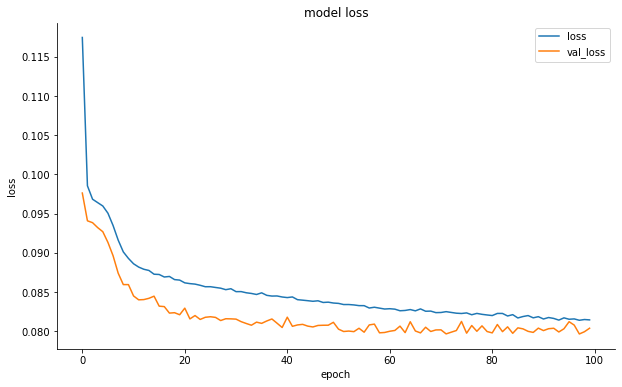

In [97]:
plt.plot(history.history['loss'][0:], label='loss')
plt.plot(history.history['val_loss'][0:], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

In [98]:
predictions = model.predict(X_test)

In [99]:
p = predictions[0]
p

array([ 1.2042210e-03, -1.2663260e-02,  1.6786209e-01,  5.4158497e-01,
        2.6679209e-01,  4.5401156e-02, -2.1447893e-05], dtype=float32)

In [100]:
p = predictions[0]
p[0]*3 + p[1]*4 + p[2]*5 + p[3]*6 + p[4]*7 + p[5]*8

6.2725337403826416

In [101]:
p = predictions[1]
p[0]*3 + p[1]*4 + p[2]*5 + p[3]*6 + p[4]*7 + p[5]*8

6.259103728458285

In [102]:
p = predictions[2]
p[0]*3 + p[1]*4 + p[2]*5 + p[3]*6 + p[4]*7 + p[5]*8

6.719198892824352

In [103]:
predictions[0].argsort()[-2:][::-1]

array([3, 4])

In [104]:
y_real = y_test.to_numpy()
y_real

array([7, 8, 8, 5, 7, 6, 5, 4, 6, 5, 7, 5, 7, 6, 5, 5, 8, 5, 7, 6, 6, 7,
       5, 5, 8, 5, 5, 6, 7, 5, 5, 5, 6, 6, 5, 7, 7, 6, 5, 6, 6, 6, 7, 6,
       4, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 5, 5, 7, 6, 6, 6, 7, 6, 7,
       6, 6, 6, 5, 5, 6, 4, 5, 5, 6, 6, 7, 7, 7, 5, 6, 6, 7, 7, 6, 5, 7,
       5, 7, 7, 5, 7, 6, 8, 7, 6, 6, 5, 6, 6, 5, 7, 6, 6, 6, 7, 7, 5, 6,
       6, 7, 6, 5, 5, 7, 7, 6, 5, 8, 5, 6, 6, 6, 7, 6, 7, 6, 6, 5, 5, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 8, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5,
       7, 5, 6, 6, 6, 5, 6, 5, 6, 6, 7, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 6,
       6, 6, 6, 5, 6, 5, 7, 6, 5, 7, 7, 6, 6, 5, 6, 5, 7, 6, 4, 5, 7, 6,
       6, 6, 7, 4, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 7, 5, 6, 7, 3, 6, 6,
       5, 6, 5, 6, 6, 5, 7, 7, 7, 5, 6, 5, 6, 6, 4, 7, 6, 4, 6, 7, 6, 4,
       7, 6, 7, 5, 4, 5, 5, 6, 6, 4, 5, 5, 7, 6, 6, 5, 6, 5, 5, 6, 5, 6,
       7, 6, 6, 6, 7, 5, 5, 6, 7, 8, 6, 6, 5, 6, 7, 5, 6, 5, 6, 4, 6, 7,
       7, 6, 5, 6, 7, 6, 6, 5, 8, 5, 5, 6, 5, 5, 5,

In [105]:
y_real = y_test.to_numpy()
for n in range(10):
    pred = np.argmax(predictions[n])+3
    print(f"Real value {y_real[n]} ==> Prediction {pred}")

Real value 7 ==> Prediction 6
Real value 8 ==> Prediction 7
Real value 8 ==> Prediction 7
Real value 5 ==> Prediction 6
Real value 7 ==> Prediction 7
Real value 6 ==> Prediction 6
Real value 5 ==> Prediction 5
Real value 4 ==> Prediction 5
Real value 6 ==> Prediction 6
Real value 5 ==> Prediction 5


In [106]:
len(predictions)

980

Calculation of "Accuraccy" taking only discrete output values 

In [107]:
num_errors = 0
for n in range(len(predictions)):
    pred = np.argmax(predictions[n])+3
    if (pred - y_real[n]) !=0: 
        num_errors +=1
num_errors

467

In [108]:
print(f"Accuraccy: {round(1-(num_errors/len(predictions)),2)}")

Accuraccy: 0.52


Calculation of "Accuraccy" considering values under and above output values 

In [109]:
num_errors = 0
for n in range(len(predictions)):
    pred = np.argmax(predictions[n])+3
    if (abs(pred - y_real[n])) > 1: 
        num_errors +=1
num_errors

41

In [110]:
print(f"Accuraccy: {round(1-(num_errors/len(predictions)),2)}")

Accuraccy: 0.96


Prediction single values (ponderated)

In [133]:
tst = np.array([0.3000, 0.1716, 0.1446, 0.0169, 0.0890, 0.9443, 0.8647, 0.1429, 0.7364, 0.3605, 0.2581])
tst

array([0.3   , 0.1716, 0.1446, 0.0169, 0.089 , 0.9443, 0.8647, 0.1429,
       0.7364, 0.3605, 0.2581])

In [134]:
tst = np.reshape(tst, (1, X_train.shape[1]))
tst.shape

(1, 11)

In [135]:
model.predict(tst)

array([[ 0.00228637, -0.08004768,  0.5406593 ,  0.44916016,  0.04365399,
         0.00304267, -0.00176258]], dtype=float32)

In [136]:
p = model.predict(tst)[0]
p[0]*3 + p[1]*4 + p[2]*5 + p[3]*6 + p[4]*7 + p[5]*8

5.414845169521868

In [382]:
tst = np.array([0.1239, 0.3562, 0.0500, 0.0685, 0.0902, 0.1194, 0.0389, 0.3590, 0.6142, 0.2515, 0.3385])
tst = np.reshape(tst, (1, X_train.shape[1]))
model.predict(tst)
p = model.predict(tst)[0]
p[0]*3 + p[1]*4 + p[2]*5 + p[3]*6 + p[4]*7 + p[5]*8

5.83848425000906

In [383]:
p

array([0.02127466, 0.0497645 , 0.17342973, 0.549012  , 0.18152452,
       0.01796375], dtype=float32)